# SVM using Radial Bias

In [2]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.svm import SVC # for Support Vector Classification model

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import seaborn as sns

### Using the Chess data from Kaggle

In [3]:
# Read in the csv
df=pd.read_csv('games.csv', encoding='utf-8')
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
# Difference between white rating and black rating - independent variable
df['rating_difference']=df['white_rating']-df['black_rating']

# White wins flag (1=win vs. 0=not-win) - dependent (target) variable
df['white_win']=df['winner'].apply(lambda x: 1 if x=='white' else 0)

# Print a snapshot of a few columns
df.iloc[:,[0,1,5,6,8,9,10,11,13,16,17]]

,id,rated,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_eco,rating_difference,white_win
0,TZJHLljE,False,outoftime,white,bourgris,1500,a-00,1191,D10,309,1
1,l1NXvwaE,True,resign,black,a-00,1322,skinnerua,1261,B00,61,0
2,mIICvQHh,True,mate,white,ischia,1496,a-00,1500,C20,-4,1
3,kWKvrqYL,True,mate,white,daniamurashov,1439,adivanov2009,1454,D02,-15,1
4,9tXo1AUZ,True,mate,white,nik221107,1523,adivanov2009,1469,C41,54,1
...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,resign,white,belcolt,1691,jamboger,1220,A80,471,1
20054,WSJDhbPl,True,mate,black,jamboger,1233,farrukhasomiddinov,1196,A41,37,0
20055,yrAas0Kj,True,mate,white,jamboger,1219,schaaksmurf3,1286,D00,-67,1
20056,b0v4tRyF,True,resign,white,marcodisogno,1360,jamboger,1227,B07,133,1


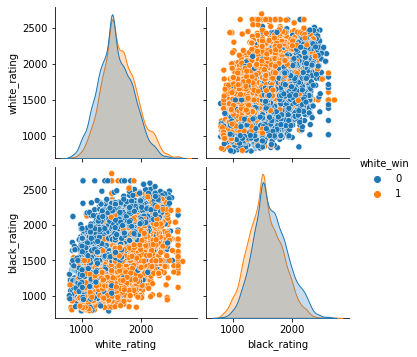

In [5]:
df = df[['white_rating', 'black_rating', 'opening_eco', 'white_win']]
sns.pairplot(df,hue='white_win')

In [4]:
def fitting(X, y, C, gamma):
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    # Note, available kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    model = SVC(kernel='rbf', probability=True, C=C, gamma=gamma)
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Use score method to get accuracy of the model
    print('----- Evaluation on Test Data -----')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')

    print('----- Evaluation on Training Data -----')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf

In [6]:
def Plot_3D(X, X_test, y_test, clf):
            
    # Specify a size of the mesh to be used
    mesh_size = 5
    margin = 1

    # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    # Calculate predictions on grid
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot with predictions
    fig = px.scatter_3d(x=X_test['rating_difference'], y=X_test['turns'], z=y_test,  opacity=0.8, color_discrete_sequence=['black'])

    # Set figure title and colors
    fig.update_layout(paper_bgcolor = 'white',scene = dict(xaxis=dict(backgroundcolor='white',color='black',gridcolor='#f0f0f0'),yaxis=dict(backgroundcolor='white', color='black', gridcolor='#f0f0f0'),zaxis=dict(backgroundcolor='lightgrey',color='black', gridcolor='#f0f0f0', )))
    # Update marker size
    fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='SVM Prediction',colorscale='RdBu', showscale=False, contours = {"z": {"show": True, "start": 0.2, "end": 0.8, "size": 0.05}}))
    fig.show()

In [7]:
# Select data for modeling
X=df[['rating_difference', 'turns']]
y=df['white_win'].values

# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(X, y, 1, 'scale')

----- Evaluation on Test Data -----
Accuracy Score:  0.6530408773678963
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      2024
           1       0.66      0.60      0.63      1988

    accuracy                           0.65      4012
   macro avg       0.65      0.65      0.65      4012
weighted avg       0.65      0.65      0.65      4012

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.6468901907017325
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      8033
           1       0.66      0.62      0.64      8013

    accuracy                           0.65     16046
   macro avg       0.65      0.65      0.65     16046
weighted avg       0.65      0.65      0.65     16046

--------------------------------------------------------


In [8]:
Plot_3D(X, X_test, y_test, clf)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions

In [7]:
# Configuration options
num_samples_total = 2500
cluster_centers = [(5,5), (3,3), (1,5)]
num_classes = len(cluster_centers)

print(num_classes)

3


In [8]:
# Generate data
X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=2500, mean=(2,3))

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
svm = SVC(random_state=42, kernel='rbf')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)


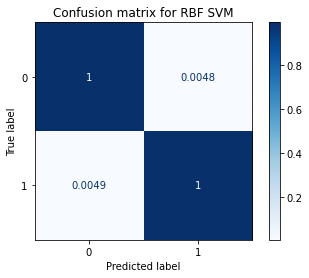

In [11]:
matrix = plot_confusion_matrix(svm, X_test, y_test,cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion matrix for RBF SVM')
plt.show(matrix)
plt.show()

In [13]:
y_pred = svm.predict(X_test)

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.9951515151515151


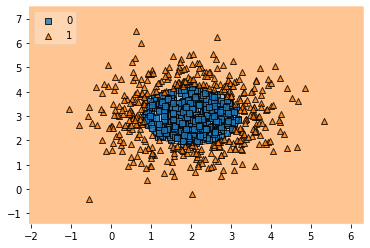

In [14]:
# Plot decision boundary
plot_decision_regions(X_test, y_test, clf=svm, legend=2)
plt.show()

# Conclusion
SVM using Radial Bias (non linear kernels) was studied and implemented